<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 Regression Challenge
## Predict the price of homes at sale for the Aimes Iowa Housing dataset

_Authors: Li Jiansheng

---


## Problem Statement
As a data scientist in Property Inc, our company is looking to develop residential homes in Aimes. It is important to forecast where and what kind of details to put into our development. The company is not just looking to build quality hoems, they also want to find out the variablss that make the house profitable. In order to do that, we have the housing data of Aimes Iowa.

## Executive Summary

### Contents:
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Visualise Categorical Data](#Visualise-Categorical-Data)
- [Prepare Test Set](#Prepare-test-set)
- [Modelling](#Modelling)
- [Summary Analysis](#Summary-Analysis)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Data-Import-and-Cleaning

### 1. Load Training Set Data

In [1]:
train_csv = './datasets/train.csv'

In [2]:
# All needed imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso,RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  

from IPython.display import display #display allows display of all columns with headers

%matplotlib inline


In [3]:
#display max is used to view all columns
df = pd.read_csv(train_csv)
pd.options.display.max_columns = None
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20


From a first look, there are many string object which suggeat a high number of category values. We will look to map them into numerical values if possible. We will split the data into number values and object for further analysis.

There are 81 columns with 2051 rows of data.

### 2. Find null values

In [6]:

nv=df.isnull().sum().sort_values(ascending=False)

for k,v in nv.items():
    if v>0: 
        print(k," : ", v)


Pool QC  :  2042
Misc Feature  :  1986
Alley  :  1911
Fence  :  1651
Fireplace Qu  :  1000
Lot Frontage  :  330
Garage Finish  :  114
Garage Cond  :  114
Garage Qual  :  114
Garage Yr Blt  :  114
Garage Type  :  113
Bsmt Exposure  :  58
BsmtFin Type 2  :  56
BsmtFin Type 1  :  55
Bsmt Cond  :  55
Bsmt Qual  :  55
Mas Vnr Type  :  22
Mas Vnr Area  :  22
Bsmt Half Bath  :  2
Bsmt Full Bath  :  2
Garage Cars  :  1
Garage Area  :  1
Bsmt Unf SF  :  1
BsmtFin SF 2  :  1
Total Bsmt SF  :  1
BsmtFin SF 1  :  1


### 3. Handling Null Values


#### Pool QC  :  2042 
This is a ranking feature for houses with pool, however with such high Null values this column should be dropped as it should not affect the price of the house.<br>

#### Misc Feature  :  1986
This feature shows availibity of other features and is suitable for for one hot encoding. However with such high Null values this column should be dropped.<br>
#### Alley  :  1911
This feature shows if there is alley access and one hot encoding will be used on this feature. however with such high Null values this column should be dropped.<br>
#### Fence  :  1651
this is a ranking of fence quality and the ranks will be map to an int. however with such high Null values this column should be dropped.<br>
#### Fireplace Qu  :  1000
this is a ranking of fireplace quality and ranks will be map to an int. however with such high Null values this column should be dropped.<br>
#### Lot Frontage  :  330
This value shows how many feet of street is connected to the property. From basic obeservation, this data seems to be Missing At Random.<br>


#### Other Null Values
Garage Finish  :  114, Garage Cond  :  114, Garage Qual  :  114 Garage Yr Blt  :  114 Garage Type  :  113<br>
These are ranking values and should be map to an integer. Their null indicates there is no garage. Instead of null I will replace with none.

Bsmt Exposure  :  58<br>
NA indicates no garage. So we replace NA with 'None'.<br>

BsmtFin Type 2  :  56, BsmtFin Type 1  :  55,Bsmt Cond  :  55,Bsmt Qual  :  55<br>
These are categorical values so will be mapped to an integer. Their null values indicate no basement.<br>

Mas Vnr Type  :  22 Mas Vnr Area  :  22<br>
The null values seem to be missing at random at there are other values to indicate none. We will use the most frequent occurance for both.<br>


Bsmt Half Bath  :  2, Bsmt Full Bath  :  2, Garage Cars  :  1, Garage Area  :  1, Bsmt Unf SF  :  1, BsmtFin SF 2  :  1, Total Bsmt SF  :  1, BsmtFin SF 1  :  1<br>
This is a number value but because there are so few, we will drop the rows.

<br>Those with many 1000 and above null values will be dropped first.
<br>We will map ordinal values to numbers.

In [7]:
df.drop(columns=['PID','Pool QC', 'Misc Feature', 'Alley','Fence','Fireplace Qu'], inplace=True)

In [8]:

df.dropna(subset=['Bsmt Half Bath','Bsmt Full Bath','Garage Cars','Garage Area','Bsmt Unf SF','BsmtFin SF 2','Total Bsmt SF','BsmtFin SF 1'],axis=0,inplace=True)

In [9]:
#Functions to clean data

def convertInt(x):
    if str(x)=='nan':
        x=0
    return int(x)    
   
def convertBool(x):
    if str(x)=='nan' or str(x)=='N':
        x=0
    else:
        x=1       
    return int(x)    

def replaceNone(x):
    if str(x)=='nan':
        x='None'
    return x    
   
def replaceZero(x):
    if str(x)=='nan':
        x=0
    return float(x)  

def getExpOrdinal(x):
    if str(x)=='Gd':
        x=3
    elif str(x)=='Av':
        x=2
    elif str(x)=='Mn':
        x=1
    elif str(x)=='nan' or str(x)=='No':
        x=0
    return x

def getOrdinal(x):
    if str(x)=='Ex':
        x=5
    elif str(x)=='Gd':
        x=4
    elif str(x)=='TA':
        x=3
    elif str(x)=='Fa':
        x=2 
    elif str(x)=='Po':
        x=1
    elif str(x)=='nan' or str(x)=='None':
        x=0
    return x

def getBsmtOrdinal(x):
    if str(x)=='GLQ':
        x=6
    elif str(x)=='ALQ':
        x=5
    elif str(x)=='BLQ':
        x=4
    elif str(x)=='Rec':
        x=3
    elif str(x)=='LwQ':
        x=2
    elif str(x)=='Unf':
        x=1
    elif str(x)=='nan' or str(x)=='None':
        x=0
    return x

def getGarageFin(x):
    if str(x)=='Fin':
        x=2
    elif str(x)=='RFn':
        x=1
    elif str(x)=='nan' or str(x)=='Unf':
        x=0
    return x

def classToCat(x):
    if x==190:
        x='Family Conversion'
    elif x==180:
        x='PUD Multi'
    elif x==160:
        x='2 Storey PUD'
    elif x==150:
        x='1.5 Storey PUD'
    elif x==120:
        x='1 Storey PUD'
    elif x==90:
        x='Duplex All'
    elif x==85:
        x='Split Foyer'
    elif x==80:
        x='Split'
    elif x==75:
        x='2.5 Story All'
    elif x==70:
        x='2 Storey 1946 Older'
    elif x==60:
        x='2 Storey 1946 Newer'
    elif x==50:
        x='1.5 Finished'
    elif x==45:
        x='1.5 Unfinished'
    elif x==40:
        x='1 Storey W/Finished Attic'
    elif x==30:
        x='1 Storey 1945 older'
    elif x==20:
        x='1 Storey Newer All'
    return x


In [10]:
#Code to replace values

df['Bsmt Exposure']=df['Bsmt Exposure'].apply(getExpOrdinal)

df['Exter Qual']=df['Exter Qual'].apply(getOrdinal)
df['Exter Cond']=df['Exter Cond'].apply(getOrdinal)
df['Bsmt Qual']=df['Bsmt Qual'].apply(getOrdinal)
df['Bsmt Cond']=df['Bsmt Cond'].apply(getOrdinal)
df['Heating QC']=df['Heating QC'].apply(getOrdinal)
df['Kitchen Qual']=df['Kitchen Qual'].apply(getOrdinal)
df['Garage Qual']=df['Garage Qual'].apply(getOrdinal)
df['Garage Cond']=df['Garage Cond'].apply(getOrdinal)
df['Central Air']=df['Central Air'].apply(convertBool)


df['BsmtFin Type 1']=df['BsmtFin Type 1'].apply(getBsmtOrdinal)
df['BsmtFin Type 2']=df['BsmtFin Type 2'].apply(getBsmtOrdinal)
df['Overall Qual']=df['Overall Qual'].apply(convertInt)
df['Garage Finish']=df['Garage Finish'].apply(getGarageFin)
df['Garage Type']=df['Garage Type'].apply(replaceNone)
df['Mas Vnr Type']=df['Mas Vnr Type'].apply(replaceNone)
df['Lot Frontage']=df['Lot Frontage'].fillna(df['Lot Frontage'].mean())
df['Garage Yr Blt']=df['Garage Yr Blt'].fillna(0)
df['Mas Vnr Type']=df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area']=df['Mas Vnr Area'].apply(replaceZero)
df['MS SubClass']=df['MS SubClass'].apply(classToCat)

In [11]:
df.isnull().sum().sort_values(ascending=False)

SalePrice        0
Year Built       0
Roof Style       0
Roof Matl        0
Exterior 1st     0
                ..
Bedroom AbvGr    0
Kitchen AbvGr    0
Kitchen Qual     0
TotRms AbvGrd    0
Id               0
Length: 75, dtype: int64

In [12]:
df.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,2 Storey 1946 Newer,RL,69.017462,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,0,6,533.0,1,0.0,192.0,725.0,GasA,5,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,Typ,0,Attchd,1976.0,1,2.0,475.0,3,3,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,2 Storey 1946 Newer,RL,43.000000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,0,6,637.0,1,0.0,276.0,913.0,GasA,5,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,Typ,1,Attchd,1997.0,1,2.0,559.0,3,3,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,1 Storey Newer All,RL,68.000000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,0,6,731.0,1,0.0,326.0,1057.0,GasA,3,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,Typ,0,Detchd,1953.0,0,1.0,246.0,3,3,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,2 Storey 1946 Newer,RL,73.000000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,0,1,0.0,1,0.0,384.0,384.0,GasA,4,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,Typ,0,BuiltIn,2007.0,2,2.0,400.0,3,3,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,1.5 Finished,RL,82.000000,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,0,1,0.0,1,0.0,676.0,676.0,GasA,3,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,Typ,0,Detchd,1957.0,0,2.0,484.0,3,3,N,0,59,0,0,0,0,0,3,2010,WD,138500


## Exploratory-Data-Analysis



### 1. Resource Files
- train.csv -- this data contains all of the training data for the model.

- test.csv -- this data contains the test data for the model. This will be used to make predictions.

- sample_sub_reg.csv -- An example of a correctly formatted submission for this challenge.


### Splitting Data into numbers and categorical

In [13]:
#Split data into discrete and continous values. We want to look at correlation in numbers first.

dis_col = df.select_dtypes(include=['object']).columns
con_col = df.select_dtypes(exclude=['object']).columns
df_dis = df[dis_col]
df_con = df[con_col]

In [14]:
len(dis_col)

25

In [15]:
df_dis.shape

(2048, 25)

In [16]:
df_con.shape

(2048, 50)

In [17]:
num_feat=list(df_con.columns)

In [18]:
num_feat

['Id',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating QC',
 'Central Air',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

### Visualising SalePrice

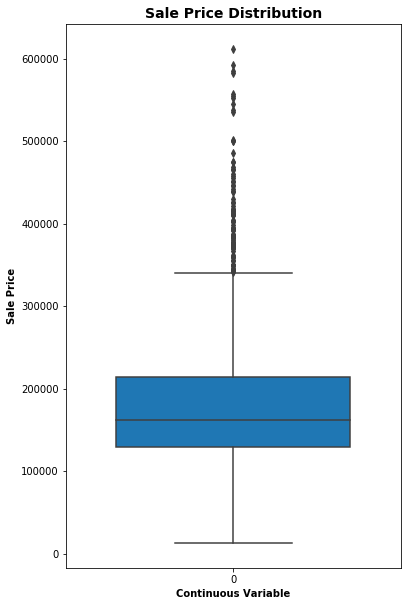

In [19]:
plt.figure(figsize=(6, 10))
ax_part = sns.boxplot(data=df['SalePrice'], orient='v',whis=1.5,saturation=1, width=0.7)  # RUN PLOT 

plt.title("Sale Price Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Sale Price", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')

plt.show()

From the box plot, 75 percentile of the home prices are around 300000 but there seem to be many outliers all the way to above 600000.

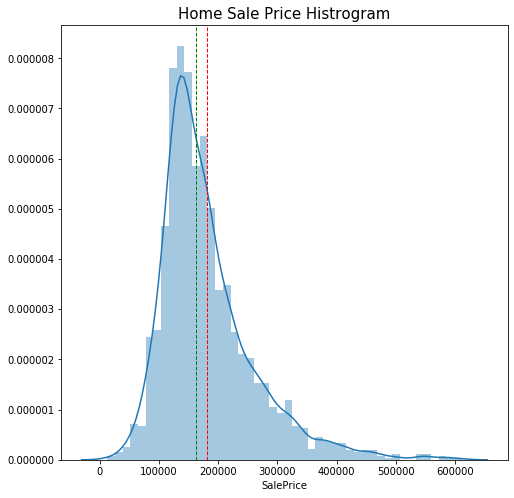

In [20]:
plt.figure(figsize=(8,8))

plt.title('Home Sale Price Histrogram', fontsize=15)
sns.distplot(df['SalePrice'])

plt.axvline(df['SalePrice'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df['SalePrice'].median(), color='g', linestyle='dashed', linewidth=1)

From the histrogram, home prices seem to be right skewed with most house prices below 200000.

In [21]:
#dataframe to use for high correlation
df_corr=df_con.corr()['SalePrice']
df_corr.sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.800975
Exter Qual         0.712880
Gr Liv Area        0.698046
Kitchen Qual       0.692190
Garage Area        0.650000
Garage Cars        0.648103
Total Bsmt SF      0.631507
1st Flr SF         0.621181
Bsmt Qual          0.617419
Year Built         0.572256
Year Remod/Add     0.550055
Garage Finish      0.549081
Full Bath          0.537369
Mas Vnr Area       0.504025
TotRms AbvGrd      0.502909
Fireplaces         0.470091
Heating QC         0.459327
BsmtFin SF 1       0.424463
Bsmt Exposure      0.413767
BsmtFin Type 1     0.351319
Open Porch SF      0.332090
Wood Deck SF       0.327007
Lot Frontage       0.325946
Lot Area           0.295121
Garage Qual        0.285858
Bsmt Full Bath     0.283564
Half Bath          0.282023
Central Air        0.277681
Garage Cond        0.265517
Garage Yr Blt      0.259150
2nd Flr SF         0.249091
Bsmt Cond          0.228258
Bsmt Unf SF        0.191090
Bedroom AbvGr      0.135178
Screen Porch       0

Text(0.5, 1, 'Correlation Heatmap')

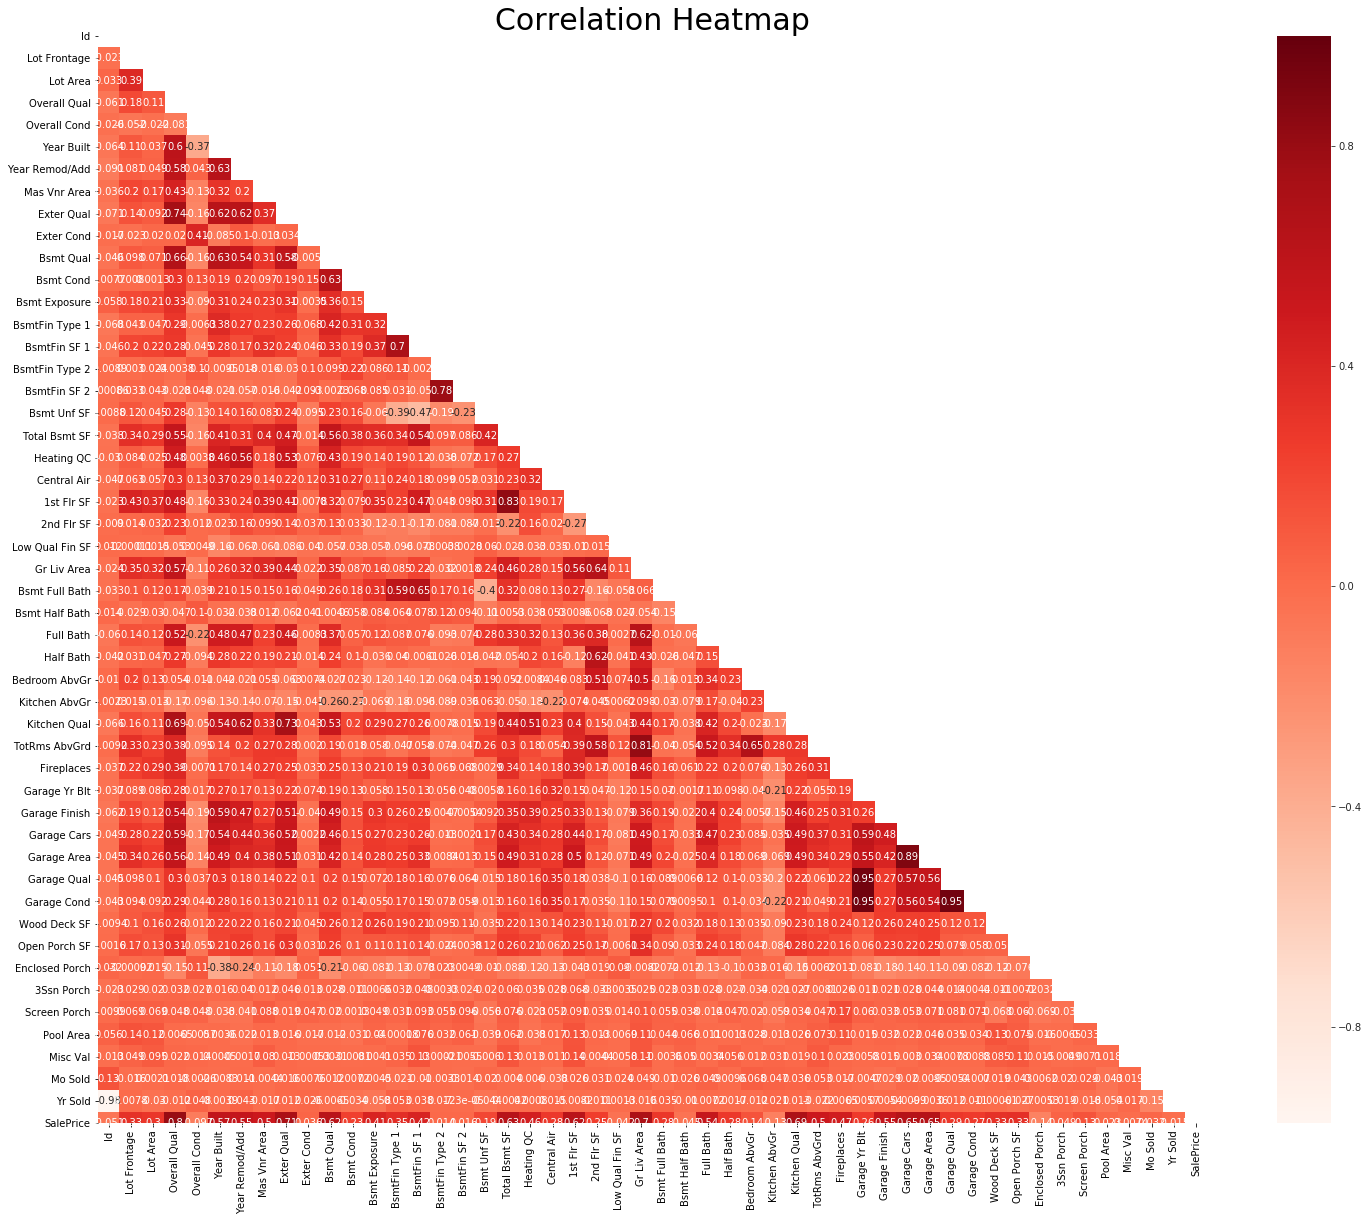

In [22]:
plt.subplots(figsize=(25,20))
#set up mask to be "True" in the upper triangle
mask = np.zeros_like(df_con.corr())
mask[np.triu_indices_from(mask)] = True
#plotting heatmap while masking upper triangle with white
with sns.axes_style("white"):
    sns.heatmap(df_con.corr(), mask=mask, square = True,cmap=plt.cm.Reds, annot=True)
plt.title("Correlation Heatmap",fontsize=30)
#sns.heatmap(df_con.corr(),annot = True)

### Features with High Correlation (above or equal 0.5)
Only Numeric features with 0.5 or more will be considered.

In [23]:
df_hc={}
df_num=[]
def high_correlation(d):  
    for k,v in d.items():
        if (v>=0.5 and v<=1) or (v<0 and v<-0.5):
            df_hc[k]=v
        df_num.append(k)
            
high_correlation(df_corr)

df_hf=pd.DataFrame(data=list(df_hc.items()),columns=['Feature', 'Correlation'])
df_hf.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
15,SalePrice,1.000000
0,Overall Qual,0.800975
4,Exter Qual,0.712880
8,Gr Liv Area,0.698046
10,Kitchen Qual,0.692190
14,Garage Area,0.650000
13,Garage Cars,0.648103
6,Total Bsmt SF,0.631507
7,1st Flr SF,0.621181
5,Bsmt Qual,0.617419


In [24]:
hc_num_feat=list(df_hc.keys())

In [25]:
len(hc_num_feat)-1

15

In [26]:
hc_num_feat

['Overall Qual',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Exter Qual',
 'Bsmt Qual',
 'Total Bsmt SF',
 '1st Flr SF',
 'Gr Liv Area',
 'Full Bath',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'SalePrice']

These 15 features will be used in our Linear Regression Model later on in our project.

### Features with High Co-Linearity

In [27]:
coLinear=df_con.corr()
coLin={}
for k,v in coLinear.items():
    for k2,v2 in v.items():
        if (v2>=0.5 and v2<1) or (v2<0 and v2<-0.5):
            coLin[k]=k2

coLin

{'Id': 'Yr Sold',
 'Overall Qual': 'SalePrice',
 'Year Built': 'SalePrice',
 'Year Remod/Add': 'SalePrice',
 'Mas Vnr Area': 'SalePrice',
 'Exter Qual': 'SalePrice',
 'Bsmt Qual': 'SalePrice',
 'Bsmt Cond': 'Bsmt Qual',
 'BsmtFin Type 1': 'Bsmt Full Bath',
 'BsmtFin SF 1': 'Bsmt Full Bath',
 'BsmtFin Type 2': 'BsmtFin SF 2',
 'BsmtFin SF 2': 'BsmtFin Type 2',
 'Total Bsmt SF': 'SalePrice',
 'Heating QC': 'Kitchen Qual',
 '1st Flr SF': 'SalePrice',
 '2nd Flr SF': 'TotRms AbvGrd',
 'Gr Liv Area': 'SalePrice',
 'Bsmt Full Bath': 'BsmtFin SF 1',
 'Full Bath': 'SalePrice',
 'Half Bath': '2nd Flr SF',
 'Bedroom AbvGr': 'TotRms AbvGrd',
 'Kitchen Qual': 'SalePrice',
 'TotRms AbvGrd': 'SalePrice',
 'Garage Yr Blt': 'Garage Cond',
 'Garage Finish': 'SalePrice',
 'Garage Cars': 'SalePrice',
 'Garage Area': 'SalePrice',
 'Garage Qual': 'Garage Cond',
 'Garage Cond': 'Garage Qual',
 'Yr Sold': 'Id',
 'SalePrice': 'Garage Area'}

We can see features with high colinearity are:<br>
'Bsmt Cond': 'Bsmt Qual'<br>
'BsmtFin Type 1': 'Bsmt Full Bath'<br>
BsmtFin SF 1 and Bsmt Full Bath<br>
2nd Flr SF and TotRms AbvGrd<br>
'BsmtFin Type 2': 'BsmtFin SF 2'<br>
 'BsmtFin SF 2': 'BsmtFin Type 2'<br>
 'Heating QC': 'Kitchen Qual'<br>
  '2nd Flr SF': 'TotRms AbvGrd'<br>
  'Garage Yr Blt': 'Garage Cond'<br>
  'Garage Cond': 'Garage Qual'<br>
Bsmt Full Bath and BsmtFin SF 1<br>
Half Bath and 2nd Flr SF<br>
Bedroom AbvGr and TotRms AbvGrd<br>

We use regularization later on to reduce the features.

## Visualise-Categorical-Data
We will use bar plots to visualise the categorical data.

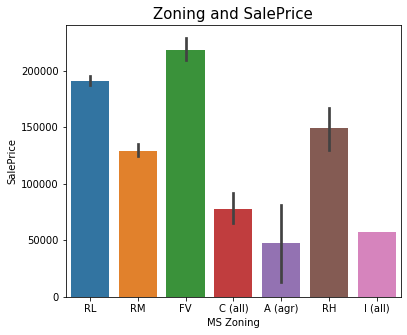

In [150]:
plt.figure(figsize=(6, 5))
ax_part = sns.barplot(y='SalePrice',x=df['MS Zoning'],data=df, orient='v')  # RUN PLOT 
plt.title("Zoning and SalePrice",fontsize=15)
plt.show()

In [121]:
df['MS Zoning'].value_counts()

RL         1597
RM          314
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

Fishing Village Residential and Residential Low density has the highest price range. Most of the data is is RL, we may remove it.

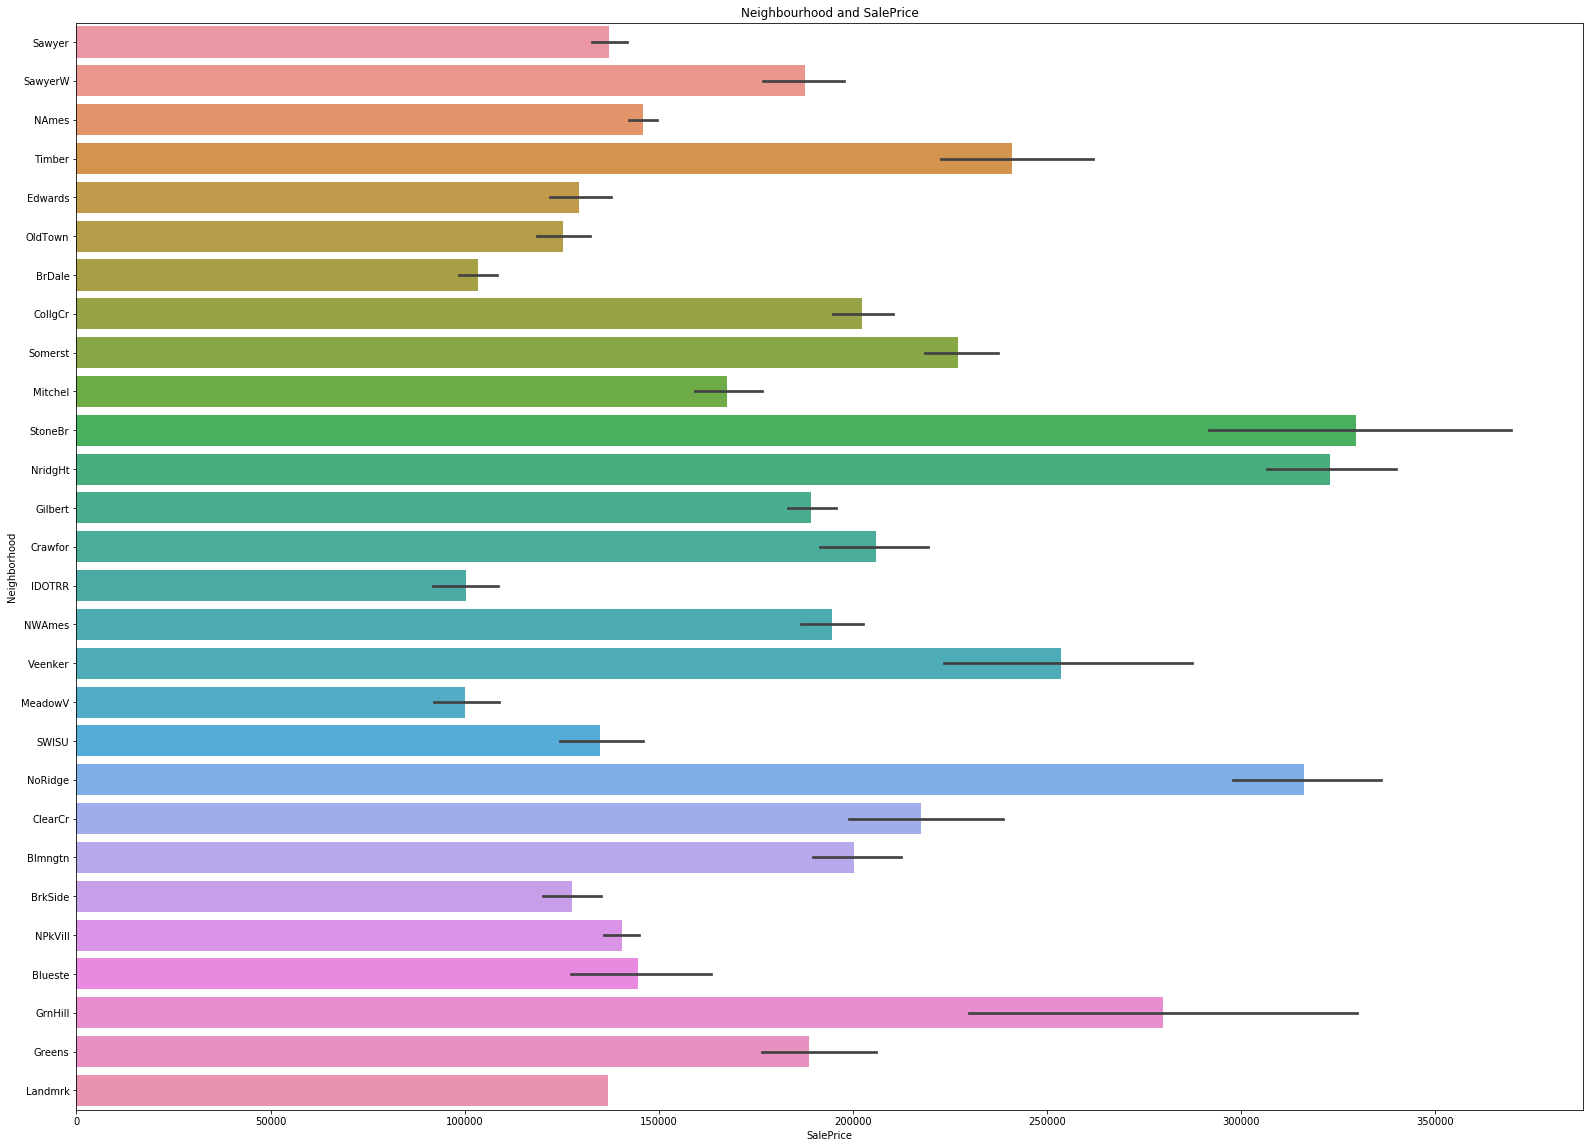

In [118]:
plt.figure(figsize=(27, 20))
ax_part = sns.barplot(x='SalePrice',y=df['Neighborhood'],data=df)  # RUN PLOT 
plt.title("Neighbourhood and SalePrice",fontsize=12)
plt.show()

In [123]:
df['Neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    142
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     75
Crawfor     71
IDOTRR      68
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

We can see some neighbourhoods are more expensive with StoneBr and NridgHt being the highest in value. IDOTRR has the lowest price homes. This feature is significant in affecting price.

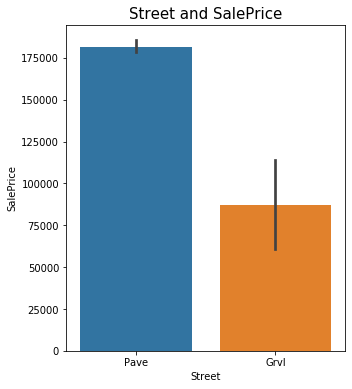

In [151]:
plt.figure(figsize=(5, 6))
sns.barplot(x = 'Street', y = 'SalePrice', data = df)
plt.title("Street and SalePrice",fontsize=15)
plt.show()

In [124]:
df['Street'].value_counts()

Pave    2041
Grvl       7
Name: Street, dtype: int64

Paved street is more expensive than gravel however as there are too many Pave street to make a significant difference.


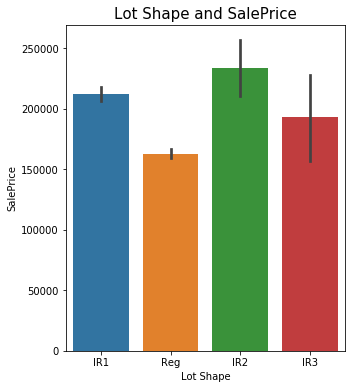

In [152]:
plt.figure(figsize=(5, 6))
sns.barplot(x = 'Lot Shape', y = 'SalePrice', data = df)
plt.title("Lot Shape and SalePrice",fontsize=15)
plt.show()

In [125]:
df['Lot Shape'].value_counts()

Reg    1294
IR1     690
IR2      55
IR3       9
Name: Lot Shape, dtype: int64

Lot shape does not seem to affect price significantly.

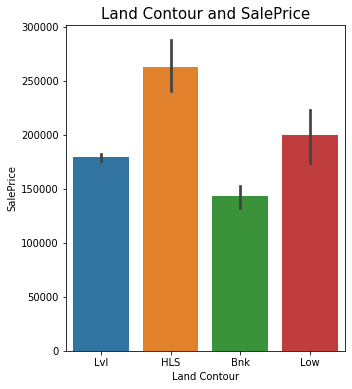

In [153]:
plt.figure(figsize=(5, 6))
sns.barplot(x = 'Land Contour', y = 'SalePrice', data = df)
plt.title("Land Contour and SalePrice",fontsize=15)
plt.show()

In [126]:
df['Land Contour'].value_counts()

Lvl    1840
HLS      85
Bnk      80
Low      43
Name: Land Contour, dtype: int64

Most houses are built on level ground, so we will remove this category.

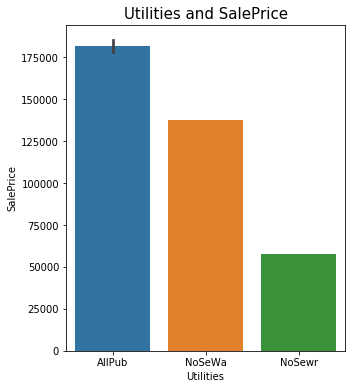

In [154]:
plt.figure(figsize=(5, 6))
sns.barplot(x = 'Utilities', y = 'SalePrice', data = df)
plt.title("Utilities and SalePrice",fontsize=15)
plt.show()

In [127]:
df['Utilities'].value_counts()

AllPub    2046
NoSewr       1
NoSeWa       1
Name: Utilities, dtype: int64

Utilities are mainly public so it is not significant.

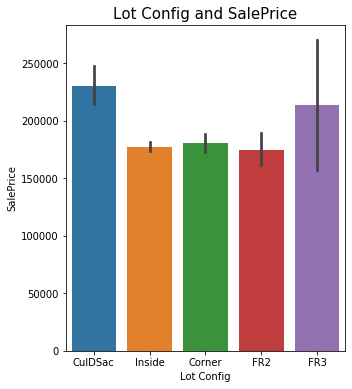

In [155]:
plt.figure(figsize=(5, 6))
sns.barplot(x = 'Lot Config', y = 'SalePrice', data = df)
plt.title("Lot Config and SalePrice",fontsize=15)
plt.show()

In [156]:
df['Lot Config'].value_counts()

Inside     1501
Corner      348
CulDSac     131
FR2          60
FR3           8
Name: Lot Config, dtype: int64

Most lot config are inside.

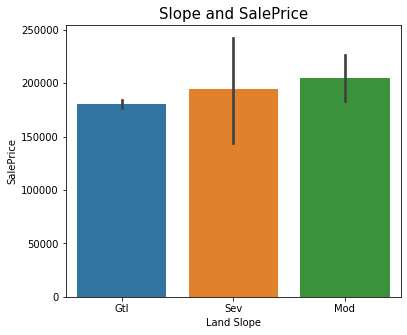

In [157]:


plt.figure(figsize=(6, 5))
sns.barplot(x = 'Land Slope', y = 'SalePrice', data = df)
plt.title("Slope and SalePrice",fontsize=15)
plt.show()

In [129]:
df['Land Slope'].value_counts()

Gtl    1950
Mod      88
Sev      10
Name: Land Slope, dtype: int64

Most homes are built on gentle land slope so we will remove this category as well.

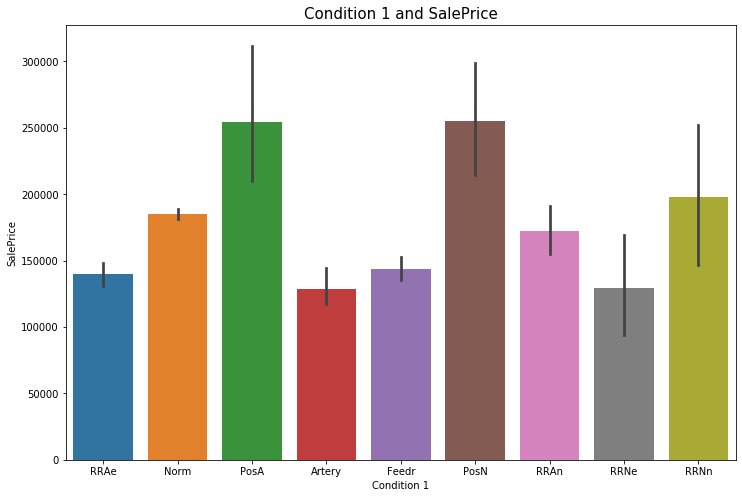

In [158]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Condition 1', y = 'SalePrice', data = df)
plt.title("Condition 1 and SalePrice",fontsize=15)
plt.show()

In [130]:
 df['Condition 1'].value_counts()

Norm      1765
Feedr      108
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: Condition 1, dtype: int64

Most conditions are normal so we will remove this category.

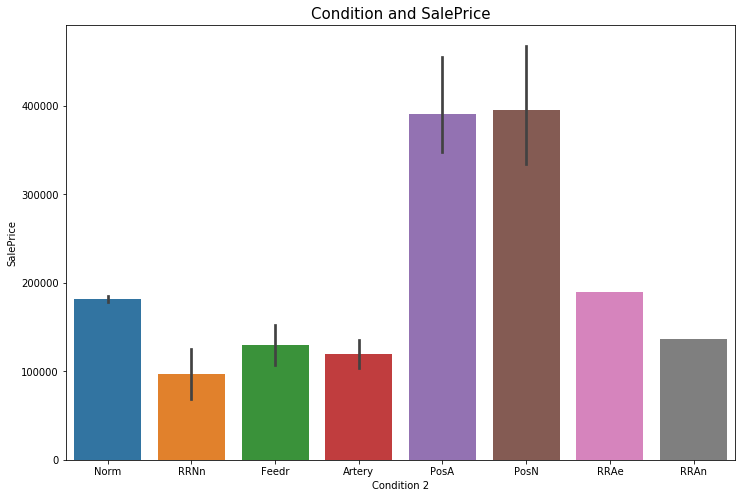

In [159]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Condition 2', y = 'SalePrice', data = df)
plt.title("Condition and SalePrice",fontsize=15)
plt.show()

In [131]:
df['Condition 2'].value_counts()

Norm      2022
Feedr       11
Artery       5
PosN         3
PosA         3
RRNn         2
RRAe         1
RRAn         1
Name: Condition 2, dtype: int64

Most conditions are normal so we will remove this category.

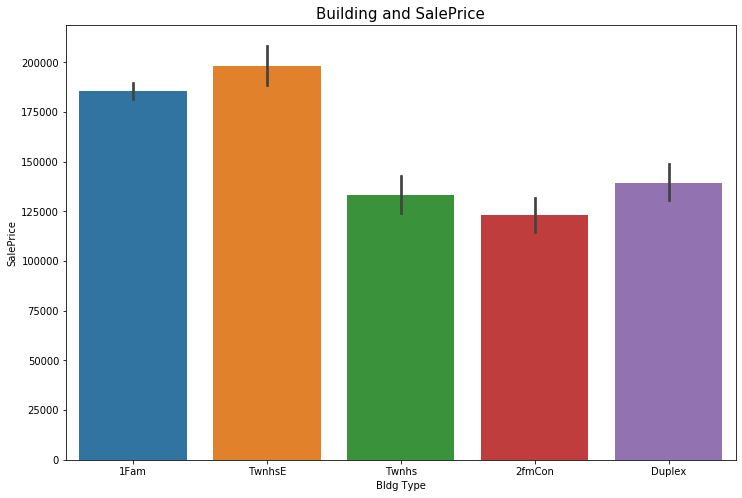

In [160]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Bldg Type', y = 'SalePrice', data = df)
plt.title("Building and SalePrice",fontsize=15)
plt.show()

In [132]:
df['Bldg Type'].value_counts()

1Fam      1697
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: Bldg Type, dtype: int64

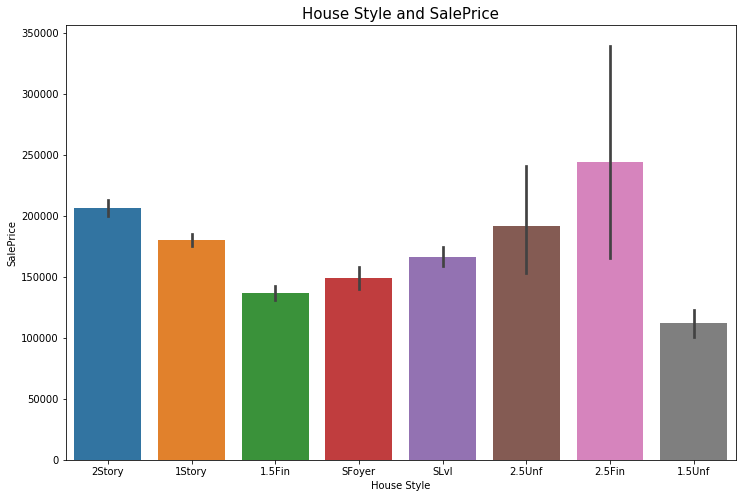

In [161]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'House Style', y = 'SalePrice', data = df)
plt.title("House Style and SalePrice",fontsize=15)
plt.show()

In [133]:
df['House Style'].value_counts()

1Story    1057
2Story     597
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: House Style, dtype: int64

Most houses are 1 story but there is a spread.

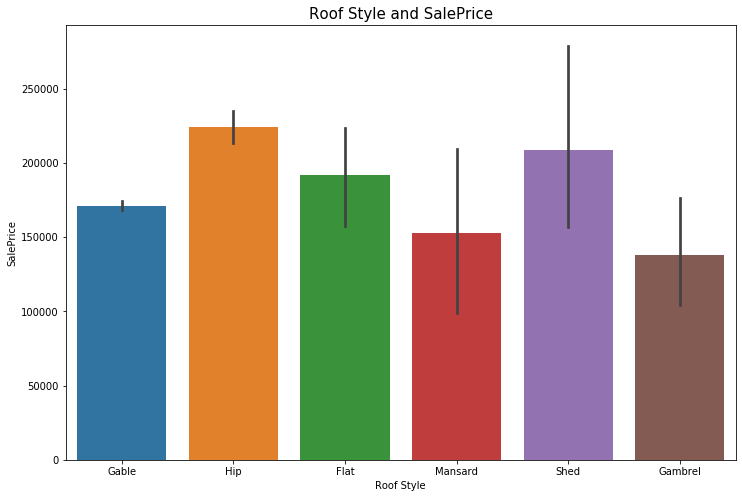

In [162]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Roof Style', y = 'SalePrice', data = df)
plt.title("Roof Style and SalePrice",fontsize=15)
plt.show()

In [134]:
df['Roof Style'].value_counts()

Gable      1616
Hip         397
Flat         13
Gambrel      12
Mansard       7
Shed          3
Name: Roof Style, dtype: int64

Most roof are Gable.

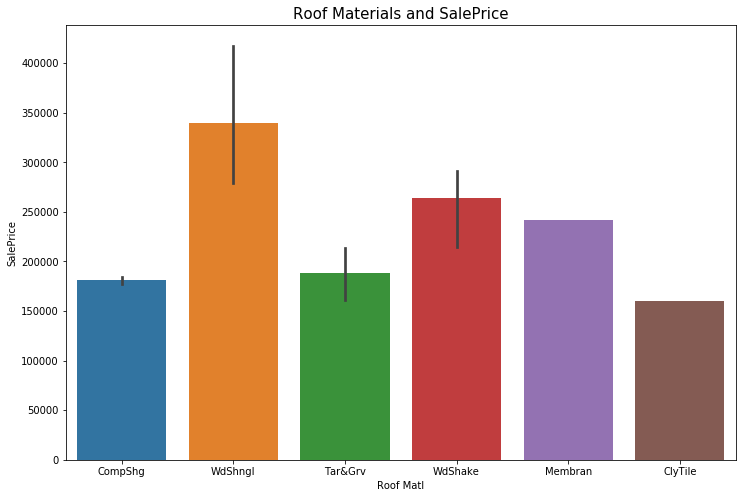

In [163]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Roof Matl', y = 'SalePrice', data = df)
plt.title("Roof Materials and SalePrice",fontsize=15)
plt.show()

In [135]:
df['Roof Matl'].value_counts()

CompShg    2022
Tar&Grv      15
WdShngl       5
WdShake       4
ClyTile       1
Membran       1
Name: Roof Matl, dtype: int64

Most roof are the same.

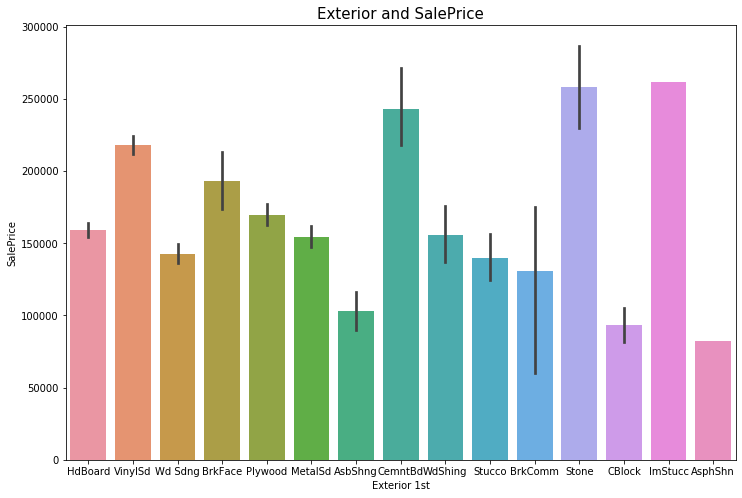

In [165]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Exterior 1st', y = 'SalePrice', data = df)
plt.title("Exterior and SalePrice",fontsize=15)
plt.show()


In [137]:
df['Exterior 1st'].value_counts()

VinylSd    724
MetalSd    330
HdBoard    300
Wd Sdng    275
Plywood    151
CemntBd     90
BrkFace     64
WdShing     45
AsbShng     33
Stucco      27
BrkComm      3
CBlock       2
Stone        2
AsphShn      1
ImStucc      1
Name: Exterior 1st, dtype: int64

Exterior has a wide spread of data.

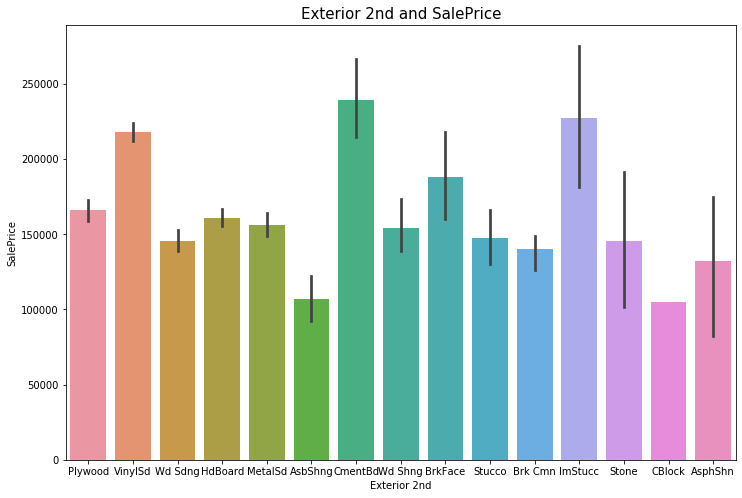

In [168]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Exterior 2nd', y = 'SalePrice', data = df)
plt.title("Exterior 2nd and SalePrice",fontsize=15)
plt.show()

In [138]:
df['Exterior 2nd'].value_counts()

VinylSd    721
MetalSd    324
HdBoard    275
Wd Sdng    262
Plywood    183
CmentBd     90
Wd Shng     63
BrkFace     34
Stucco      30
AsbShng     28
Brk Cmn     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       1
Name: Exterior 2nd, dtype: int64

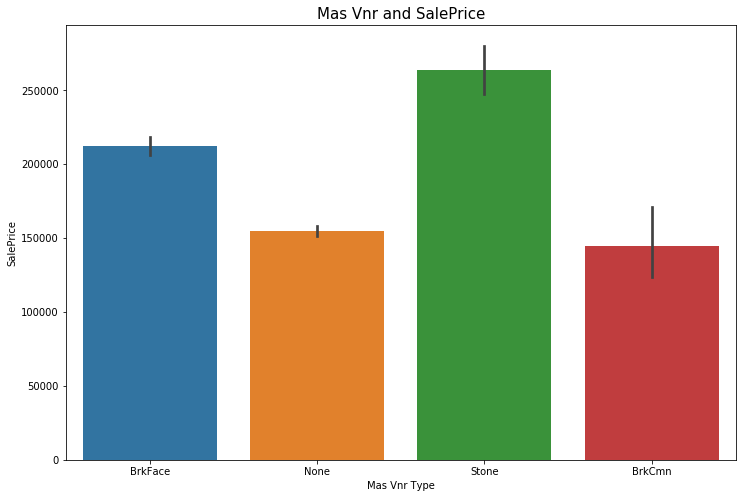

In [169]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Mas Vnr Type', y = 'SalePrice', data = df)
plt.title("Mas Vnr and SalePrice",fontsize=15)
plt.show()

In [139]:
df['Mas Vnr Type'].value_counts()

None       1237
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

Most of the value is none.

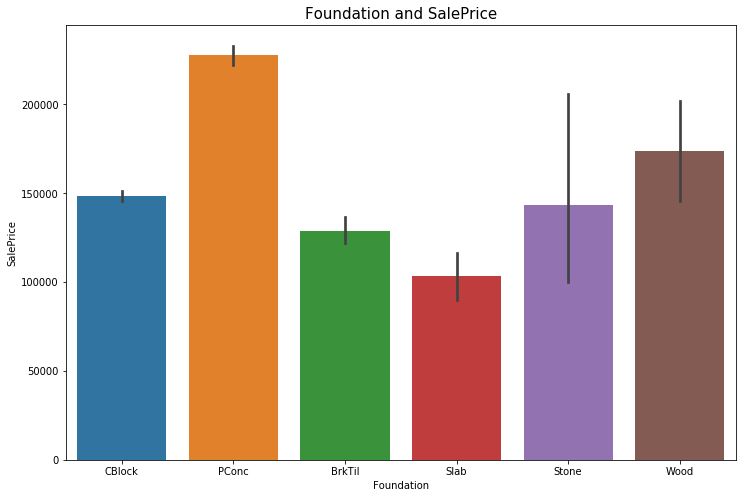

In [170]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Foundation', y = 'SalePrice', data = df)
plt.title("Foundation and SalePrice",fontsize=15)
plt.show()

In [140]:
df['Foundation'].value_counts()

PConc     925
CBlock    863
BrkTil    220
Slab       33
Stone       5
Wood        2
Name: Foundation, dtype: int64

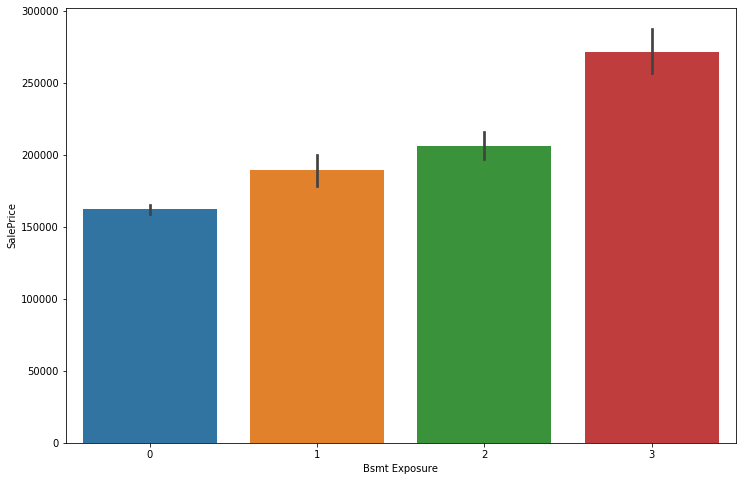

In [46]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Bsmt Exposure', y = 'SalePrice', data = df)
plt.show()bb


In [141]:
df['Bsmt Exposure'].value_counts()

0    1394
2     288
3     203
1     163
Name: Bsmt Exposure, dtype: int64

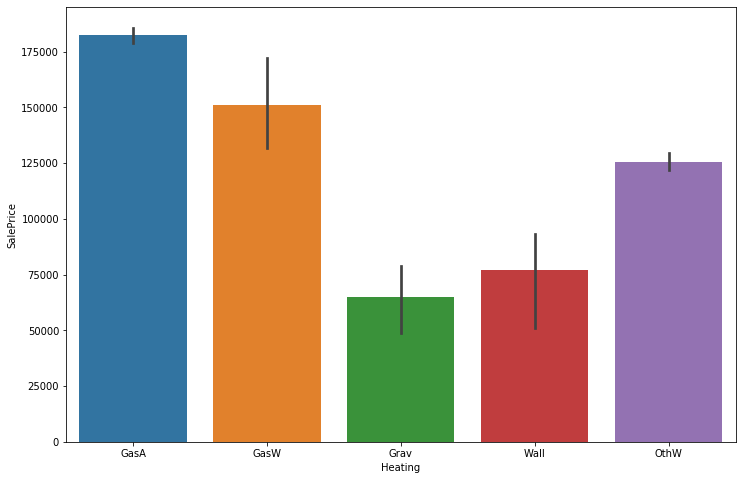

In [47]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Heating', y = 'SalePrice', data = df)
plt.show()

In [142]:
df['Heating'].value_counts()

GasA    2015
GasW      20
Wall       6
Grav       5
OthW       2
Name: Heating, dtype: int64

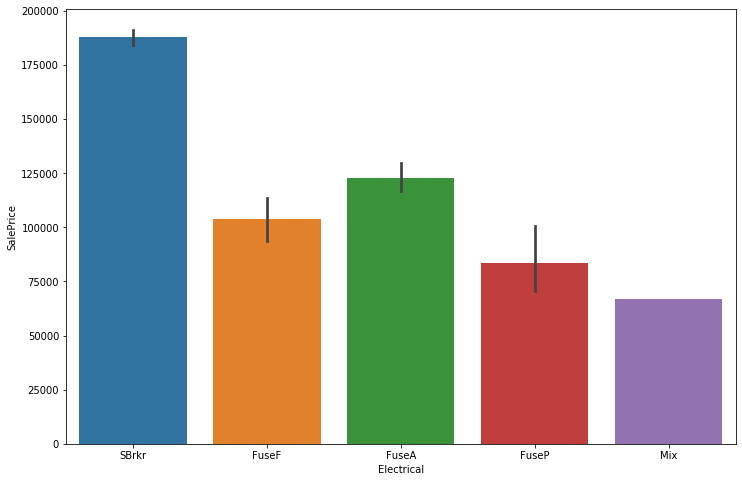

In [48]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Electrical', y = 'SalePrice', data = df)
plt.show()

In [143]:
df['Electrical'].value_counts()

SBrkr    1866
FuseA     139
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

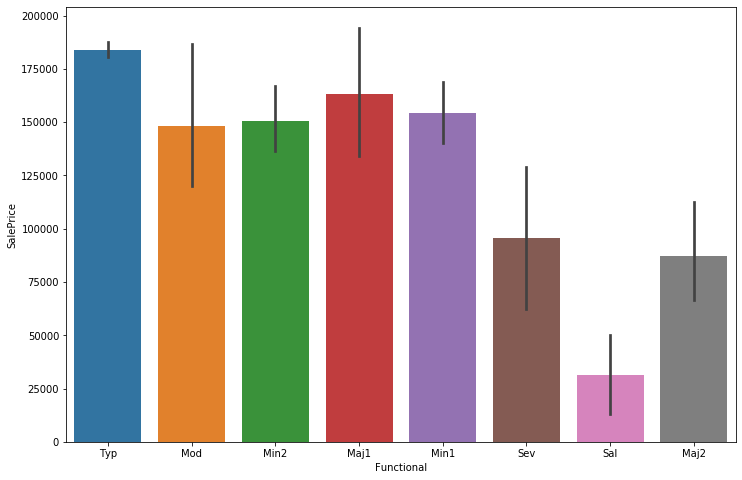

In [49]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Functional', y = 'SalePrice', data = df)
plt.show()


In [144]:
df['Functional'].value_counts()

Typ     1912
Min1      42
Min2      42
Mod       29
Maj1      12
Maj2       7
Sev        2
Sal        2
Name: Functional, dtype: int64

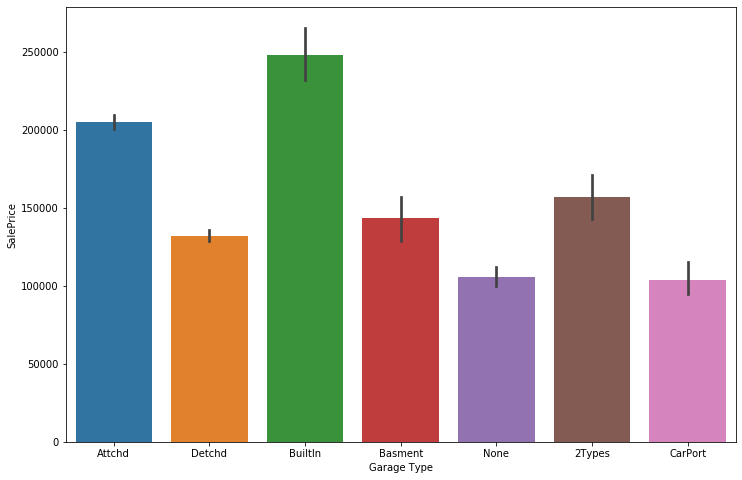

In [50]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Garage Type', y = 'SalePrice', data = df)
plt.show()

In [145]:
df['Garage Type'].value_counts()

Attchd     1212
Detchd      534
BuiltIn     132
None        113
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

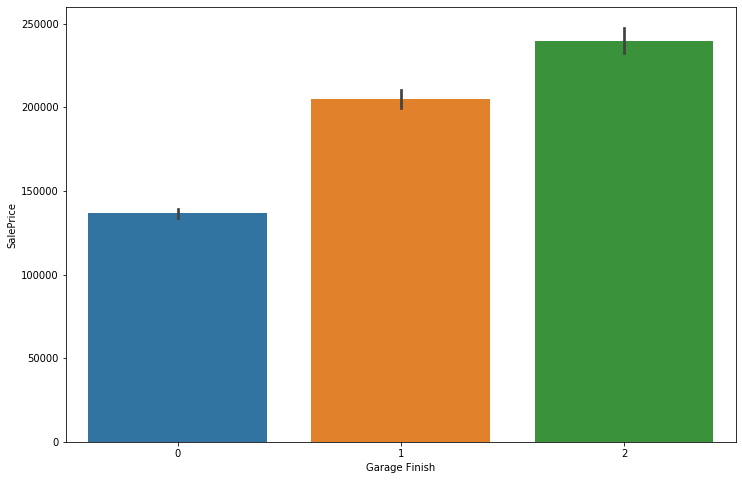

In [51]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Garage Finish', y = 'SalePrice', data = df)
plt.show()

In [146]:
df['Garage Finish'].value_counts()

0    960
1    579
2    509
Name: Garage Finish, dtype: int64

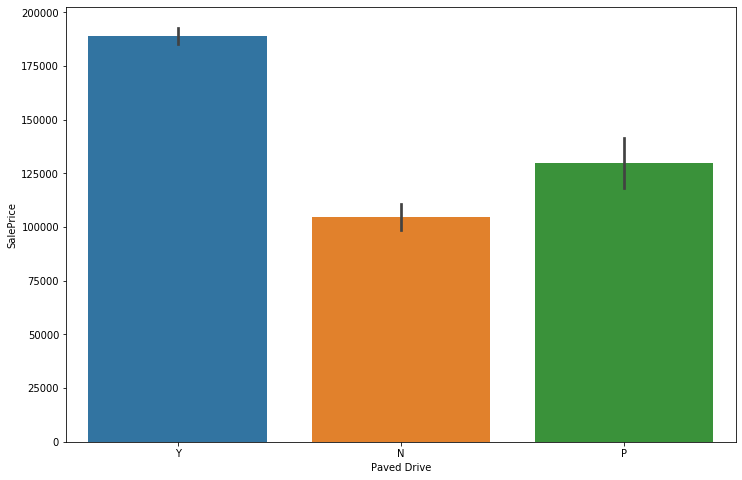

In [52]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Paved Drive', y = 'SalePrice', data = df)
plt.show()

In [148]:
df['Paved Drive'].value_counts()

Y    1858
N     151
P      39
Name: Paved Drive, dtype: int64

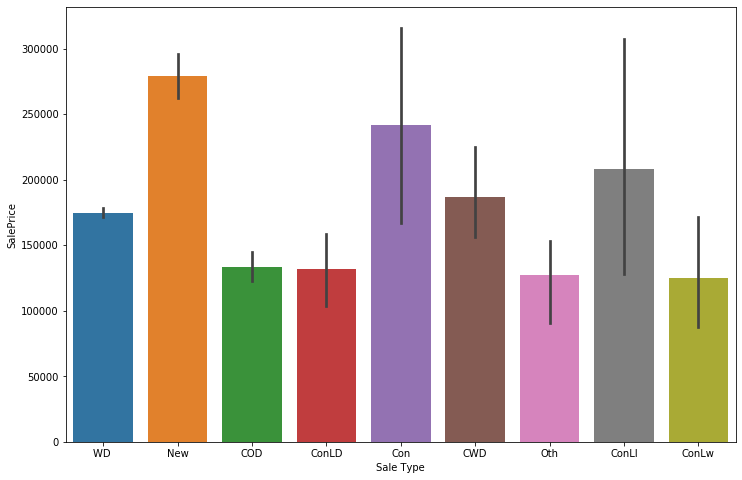

In [53]:
plt.figure(figsize=(12, 8))

sns.barplot(x = 'Sale Type', y = 'SalePrice', data = df)
plt.show()


In [149]:
df['Sale Type'].value_counts()

WD       1779
New       160
COD        63
ConLD      16
CWD        10
ConLI       7
ConLw       5
Con         4
Oth         4
Name: Sale Type, dtype: int64

#### Summary
After looking at all the boxplots, only utilities have little impact on sale price as only two homes do not use public utilities. We will create dummy variables for all categorical data.


In [54]:
df_dis.columns

Index(['MS SubClass', 'MS Zoning', 'Street', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating',
       'Electrical', 'Functional', 'Garage Type', 'Paved Drive', 'Sale Type'],
      dtype='object')

In [55]:
#This code is to enter which column to remove. We will remove columns when it contains a high occurence of a value
dcol=['MS SubClass', 'MS Zoning', 'Street', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating',
       'Electrical', 'Functional', 'Garage Type', 'Paved Drive', 'Sale Type']
df_dis.drop(columns=dcol,inplace=True)

df_dis.head()


/opt/anaconda3/envs/DSI/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Neighborhood
0,Sawyer
1,SawyerW
2,NAmes
3,Timber
4,SawyerW


### One Hot Encoding
We will do one hot encoding for the data we need.

In [56]:
#prep a one hot encoding dataframe
ohe_df=df_dis

In [57]:
#Create numerical high correlation dataframe
dummies = pd.get_dummies(ohe_df, drop_first = True)
print(dummies.shape)
df_hc=df.loc[:,hc_num_feat]
df_hc.head()

df_hc=pd.DataFrame(df_hc)
df_hc.head()

(2048, 27)


,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Garage Finish,Garage Cars,Garage Area,SalePrice
0,6,1976,2005,289.0,4,3,725.0,725,1479,2,4,6,1,2.0,475.0,130500
1,7,1996,1997,132.0,4,4,913.0,913,2122,2,4,8,1,2.0,559.0,220000
2,5,1953,2007,0.0,3,3,1057.0,1057,1057,1,4,5,0,1.0,246.0,109000
3,5,2006,2007,0.0,3,4,384.0,744,1444,2,3,7,2,2.0,400.0,174000
4,6,1900,1993,0.0,3,2,676.0,831,1445,2,3,6,0,2.0,484.0,138500


### Scale Values for Numerical Values
I have decided not to scale the number values as it drastically affect the Sale Price prediction.

In [58]:
s_df=df_hc.drop(columns='SalePrice')
scaler = preprocessing.StandardScaler()
df_hc_ss=scaler.fit_transform(s_df)
#df_hc_ss=pd.DataFrame(df_hc_ss,columns=s_df.columns)
df_hc_ss=s_df

In [59]:
df_hc_ss.head()

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Garage Finish,Garage Cars,Garage Area
0,6,1976,2005,289.0,4,3,725.0,725,1479,2,4,6,1,2.0,475.0
1,7,1996,1997,132.0,4,4,913.0,913,2122,2,4,8,1,2.0,559.0
2,5,1953,2007,0.0,3,3,1057.0,1057,1057,1,4,5,0,1.0,246.0
3,5,2006,2007,0.0,3,4,384.0,744,1444,2,3,7,2,2.0,400.0
4,6,1900,1993,0.0,3,2,676.0,831,1445,2,3,6,0,2.0,484.0


In [60]:
df_hc_ss['SalePrice']=df_hc['SalePrice']

In [61]:
#once encoding is done, we wil merge it back with the number data
df_feat=df_hc_ss.merge(dummies,left_index=True,right_index=True)
df_feat.head()

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Garage Finish,Garage Cars,Garage Area,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,6,1976,2005,289.0,4,3,725.0,725,1479,2,4,6,1,2.0,475.0,130500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,7,1996,1997,132.0,4,4,913.0,913,2122,2,4,8,1,2.0,559.0,220000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,5,1953,2007,0.0,3,3,1057.0,1057,1057,1,4,5,0,1.0,246.0,109000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,5,2006,2007,0.0,3,4,384.0,744,1444,2,3,7,2,2.0,400.0,174000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6,1900,1993,0.0,3,2,676.0,831,1445,2,3,6,0,2.0,484.0,138500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [62]:
#Set all features to a featureslist
features=df_feat.columns


In [63]:
df_feat.shape

(2048, 43)

## Prepare-test-set
Steps to clean the test data is same for the train as we will need it for creating our model. We will not do train test split as the test data is already given. We will use the function cross_value_score to do k fold testing instead.

In [64]:
test_csv = './datasets/test.csv'

test_df = pd.read_csv(test_csv)
pd.options.display.max_columns = None
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [65]:
test_df.shape

(879, 80)

In [66]:
nv=test_df.isnull().sum().sort_values(ascending=False)

for k,v in nv.items():
    if v>0: 
        print(k," : ", v)

Pool QC  :  875
Misc Feature  :  838
Alley  :  821
Fence  :  707
Fireplace Qu  :  422
Lot Frontage  :  160
Garage Cond  :  45
Garage Qual  :  45
Garage Yr Blt  :  45
Garage Finish  :  45
Garage Type  :  44
Bsmt Exposure  :  25
BsmtFin Type 1  :  25
Bsmt Qual  :  25
BsmtFin Type 2  :  25
Bsmt Cond  :  25
Mas Vnr Area  :  1
Mas Vnr Type  :  1
Electrical  :  1


In [67]:
test_df.drop(columns=['PID','Pool QC', 'Misc Feature', 'Alley','Fence','Fireplace Qu'], inplace=True)
test_df.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,0,4,2006,WD
1,2718,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,0,8,2006,WD
2,2414,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,0,9,2006,New
3,1989,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,0,7,2007,WD
4,625,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,0,7,2009,WD


In [68]:

test_df['Bsmt Exposure']=test_df['Bsmt Exposure'].apply(getExpOrdinal)

test_df['Exter Qual']=test_df['Exter Qual'].apply(getOrdinal)
test_df['Exter Cond']=test_df['Exter Cond'].apply(getOrdinal)
test_df['Bsmt Qual']=test_df['Bsmt Qual'].apply(getOrdinal)
test_df['Bsmt Cond']=test_df['Bsmt Cond'].apply(getOrdinal)
test_df['Heating QC']=test_df['Heating QC'].apply(getOrdinal)
test_df['Kitchen Qual']=test_df['Kitchen Qual'].apply(getOrdinal)
test_df['Garage Qual']=test_df['Garage Qual'].apply(getOrdinal)
test_df['Garage Cond']=test_df['Garage Cond'].apply(getOrdinal)
test_df['Central Air']=test_df['Central Air'].apply(convertBool)


test_df['BsmtFin Type 1']=test_df['BsmtFin Type 1'].apply(getBsmtOrdinal)
test_df['BsmtFin Type 2']=test_df['BsmtFin Type 2'].apply(getBsmtOrdinal)
test_df['Overall Qual']=test_df['Overall Qual'].apply(convertInt)
test_df['Garage Finish']=test_df['Garage Finish'].apply(getGarageFin)
test_df['Garage Type']=test_df['Garage Type'].apply(replaceNone)
test_df['Mas Vnr Type']=test_df['Mas Vnr Type'].apply(replaceNone)
test_df['Lot Frontage']=test_df['Lot Frontage'].fillna(df['Lot Frontage'].mean())
test_df['Garage Yr Blt']=test_df['Garage Yr Blt'].fillna(0)
test_df['Mas Vnr Type']=test_df['Mas Vnr Type'].fillna('None')
test_df['Mas Vnr Area']=test_df['Mas Vnr Area'].apply(replaceZero)
test_df['MS SubClass']=test_df['MS SubClass'].apply(classToCat)

In [69]:
#Delete later
#test_df.dropna(subset=['Bsmt Half Bath','Bsmt Full Bath','Garage Cars','Garage Area','Bsmt Unf SF','BsmtFin SF 2','Total Bsmt SF','BsmtFin SF 1','Electrical'],axis=0,inplace=True)

In [70]:
test_df.isnull().sum().sort_values(ascending=False)

Electrical       1
Sale Type        0
Exter Qual       0
Roof Style       0
Roof Matl        0
                ..
Half Bath        0
Bedroom AbvGr    0
Kitchen AbvGr    0
Kitchen Qual     0
Id               0
Length: 74, dtype: int64

In [71]:
test_df['Electrical'].value_counts()

SBrkr    814
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

In [72]:
#Since most of the values are Sbrkr, we fill  na with this value
test_df['Electrical']=test_df['Electrical'].fillna('SBrkr')

In [73]:
test_df.isnull().sum().sort_values(ascending=False)

Sale Type        0
Year Built       0
Roof Style       0
Roof Matl        0
Exterior 1st     0
                ..
Half Bath        0
Bedroom AbvGr    0
Kitchen AbvGr    0
Kitchen Qual     0
Id               0
Length: 74, dtype: int64

In [74]:
#Split data into discrete and continous values. We want to look at correlation in numbers first.

test_dis_col = test_df.select_dtypes(include=['object']).columns
test_con_col = test_df.select_dtypes(exclude=['object']).columns
test_df_dis = test_df[test_dis_col]
test_df_con = test_df[test_con_col]

In [75]:
test_dis_col.shape

(25,)

In [76]:
dis_col.shape

(25,)

In [77]:
test_df_con.shape

(879, 49)

In [78]:
df_con.shape

(2048, 50)

In [79]:
test_df_dis.drop(columns=dcol,inplace=True)
test_df_dis.head()


/opt/anaconda3/envs/DSI/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Neighborhood
0,OldTown
1,Sawyer
2,Gilbert
3,OldTown
4,NAmes


In [80]:
test_ohe_df=test_df_dis

In [81]:
hc_num_feat.pop()

'SalePrice'

In [82]:
hc_num_feat.append('Id')

In [83]:

test_df_hc=test_df.loc[:,hc_num_feat]
#test_df_hc.drop(columns='SalePrice',inplace=True)
test_df_hc.head()
test_id=test_df_hc['Id']
test_df_hc.drop(columns='Id',inplace=True)
test_df_hc

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Garage Finish,Garage Cars,Garage Area
0,6,1910,1950,0.0,3,2,1020,908,1928,2,2,9,0,1,440
1,5,1977,1977,0.0,3,4,1967,1967,1967,2,3,10,2,2,580
2,7,2006,2006,0.0,4,4,654,664,1496,2,4,7,1,2,426
3,5,1923,2006,0.0,4,3,968,968,968,1,3,5,0,2,480
4,6,1963,1963,247.0,3,4,1394,1394,1394,1,3,6,1,2,514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,6,1974,1974,0.0,3,3,1084,1084,1877,2,3,8,0,2,488
875,6,1966,1999,410.0,4,3,1104,1104,1988,2,4,9,1,2,480
876,5,1968,1968,0.0,3,3,952,1211,1211,1,3,5,0,1,322
877,4,1971,1971,0.0,3,3,864,864,864,1,3,5,0,2,528


In [84]:
#scaler = preprocessing.StandardScaler()
#test_df_hc_ss=scaler.transform(test_df_hc)
test_df_hc_ss=test_df_hc

In [85]:
test_df_hc_ss=pd.DataFrame(test_df_hc,columns=test_df_hc.columns)

In [86]:
test_dummies = pd.get_dummies(test_ohe_df, drop_first = True)
test_dummies.shape

(879, 25)

In [87]:
dummies.shape

(2048, 27)

Shape of dummies and test dummies are different. We will use align to align our encoding so that we can use it for modeling.

In [88]:
d1, d2 = dummies.align(test_dummies, join='left', axis=1)
d2.shape

(879, 27)

In [89]:
d2=d2.fillna(0)

In [90]:
d2.isnull().sum().sort_values()

Neighborhood_Blueste    0
Neighborhood_StoneBr    0
Neighborhood_Somerst    0
Neighborhood_SawyerW    0
Neighborhood_Sawyer     0
Neighborhood_SWISU      0
Neighborhood_OldTown    0
Neighborhood_NridgHt    0
Neighborhood_NoRidge    0
Neighborhood_NWAmes     0
Neighborhood_NPkVill    0
Neighborhood_NAmes      0
Neighborhood_Timber     0
Neighborhood_Mitchel    0
Neighborhood_Landmrk    0
Neighborhood_IDOTRR     0
Neighborhood_GrnHill    0
Neighborhood_Greens     0
Neighborhood_Gilbert    0
Neighborhood_Edwards    0
Neighborhood_Crawfor    0
Neighborhood_CollgCr    0
Neighborhood_ClearCr    0
Neighborhood_BrkSide    0
Neighborhood_BrDale     0
Neighborhood_MeadowV    0
Neighborhood_Veenker    0
dtype: int64

In [91]:

test_df_feat=test_df_hc_ss.merge(d2,left_index=True,right_index=True)
test_df_feat['Id']=test_id
test_df_feat.head()



,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Garage Finish,Garage Cars,Garage Area,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Id
0,6,1910,1950,0.0,3,2,1020,908,1928,2,2,9,0,1,440,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2658
1,5,1977,1977,0.0,3,4,1967,1967,1967,2,3,10,2,2,580,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2718
2,7,2006,2006,0.0,4,4,654,664,1496,2,4,7,1,2,426,0,0,0,0,0,0,0,1,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2414
3,5,1923,2006,0.0,4,3,968,968,968,1,3,5,0,2,480,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1989
4,6,1963,1963,247.0,3,4,1394,1394,1394,1,3,6,1,2,514,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,625


In [92]:
test_df_feat.shape

(879, 43)

## Modelling
Once our data is cleaned and we gone through basic features selection, we can start on our model. 

### 1. Create Linear Regression Model

In [93]:
features=df_feat.columns

In [94]:
features=[v for v in features if v!='SalePrice']

In [95]:
features=[v for v in features if v!='Id']

In [96]:
X=df_feat[features]
y=df_feat['SalePrice']

In [97]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
lr_scores = cross_val_score(lr, X, y, cv=10)

print(lr_scores)
print(np.mean(lr_scores))

[0.81772104 0.86620532 0.88614012 0.88153356 0.6628035  0.86821621
 0.87294078 0.83917534 0.84189642 0.71944328]
0.8256075571248939


In [99]:
def r2_adj(y_true, y_preds, p):
    n = len(y_true)
    y_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_true - y_preds)) / (n - p - 1)
    denominator = np.sum(np.square(y_true - y_mean)) / (n - 1)
    return 1 - numerator / denominator

In [100]:
def lord_of_the_metrics(y_true, y_pred, p):
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    #msle = metrics.mean_squared_log_error(y_true, y_pred)
    mae = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    r2a = r2_adj(y_true, y_pred, p)
    
    print('Mean squared error      = ', mse)
    print('Root mean squared error = ', rmse)
   # print('Mean squared log error  = ', msle)
    print('Median absolute error   = ', mae)
    print('R^2                     = ', r2)
    print('Adjusted R^2            = ', r2a)

In [101]:
lord_of_the_metrics(df_feat['SalePrice'],lr.predict(df_feat[features]),len(features))

Mean squared error      =  985472819.8814013
Root mean squared error =  31392.241396265435
Median absolute error   =  14340.438415829733
R^2                     =  0.843009660641472
Adjusted R^2            =  0.8397210849541612


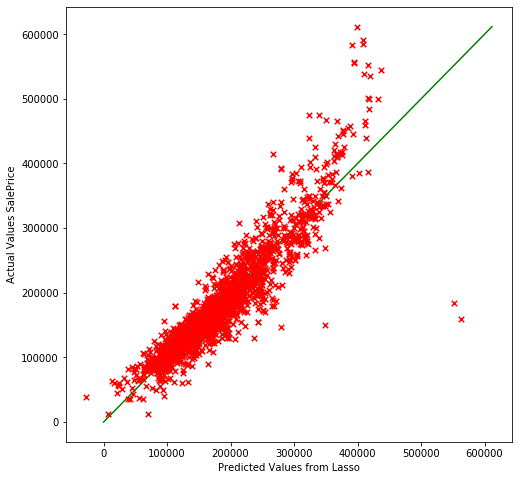

In [102]:
plt.figure(figsize=(8,8))
plt.scatter(lr.predict(X), y, s=30, c='r', marker='x', zorder=10)
plt.xlabel("Predicted Values from Lasso")
plt.ylabel("Actual Values SalePrice")

plt.plot([0, np.max(y)], [0, np.max(y)], c = 'g')

plt.show()

### 2. Use Recursive Feature Elimination
We will use RFE to find a suitable number of variables for our model. We will then use the variables for our Ridge and Lasso Model.

In [103]:
rfe = RFE(lr, 35)             
rfe = rfe.fit(X, y)

In [104]:
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('Overall Qual', True, 1),
 ('Year Built', False, 3),
 ('Year Remod/Add', False, 2),
 ('Mas Vnr Area', False, 6),
 ('Exter Qual', True, 1),
 ('Bsmt Qual', True, 1),
 ('Total Bsmt SF', False, 8),
 ('1st Flr SF', False, 7),
 ('Gr Liv Area', False, 4),
 ('Full Bath', True, 1),
 ('Kitchen Qual', True, 1),
 ('TotRms AbvGrd', True, 1),
 ('Garage Finish', True, 1),
 ('Garage Cars', True, 1),
 ('Garage Area', False, 5),
 ('Neighborhood_Blueste', True, 1),
 ('Neighborhood_BrDale', True, 1),
 ('Neighborhood_BrkSide', True, 1),
 ('Neighborhood_ClearCr', True, 1),
 ('Neighborhood_CollgCr', True, 1),
 ('Neighborhood_Crawfor', True, 1),
 ('Neighborhood_Edwards', True, 1),
 ('Neighborhood_Gilbert', True, 1),
 ('Neighborhood_Greens', True, 1),
 ('Neighborhood_GrnHill', True, 1),
 ('Neighborhood_IDOTRR', True, 1),
 ('Neighborhood_Landmrk', True, 1),
 ('Neighborhood_MeadowV', True, 1),
 ('Neighborhood_Mitchel', True, 1),
 ('Neighborhood_NAmes', True, 1),
 ('Neighborhood_NPkVill', True, 1),
 ('Neighborh

In [105]:
col_sup = X.columns[rfe.support_]
col_sup

Index(['Overall Qual', 'Exter Qual', 'Bsmt Qual', 'Full Bath', 'Kitchen Qual',
       'TotRms AbvGrd', 'Garage Finish', 'Garage Cars', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill',
       'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker'],
      dtype='object')

In [106]:
X_rfe = X[col_sup]
lwp_feat=X_rfe.columns


In [107]:
#This will be our new set of features
lwp_feat

Index(['Overall Qual', 'Exter Qual', 'Bsmt Qual', 'Full Bath', 'Kitchen Qual',
       'TotRms AbvGrd', 'Garage Finish', 'Garage Cars', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill',
       'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker'],
      dtype='object')

In [108]:
X=df_feat[lwp_feat]
y=df_feat['SalePrice']

### 3. Ridge Regularization

In [109]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X, y)

print(optimal_ridge.alpha_)

1.0


In [110]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X, y, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[0.78968614 0.82161847 0.83545628 0.82433973 0.77677707 0.80940328
 0.82316232 0.78895586 0.80266598 0.71288945]
0.7984954578408631


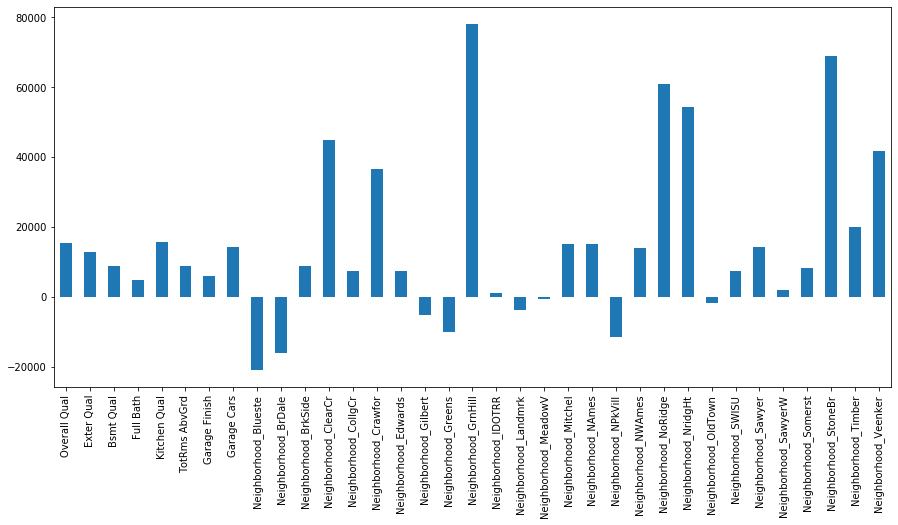

In [111]:
ridge.fit(X,y)
pd.Series(ridge.coef_, index=lwp_feat).plot.bar(figsize=(15, 7))

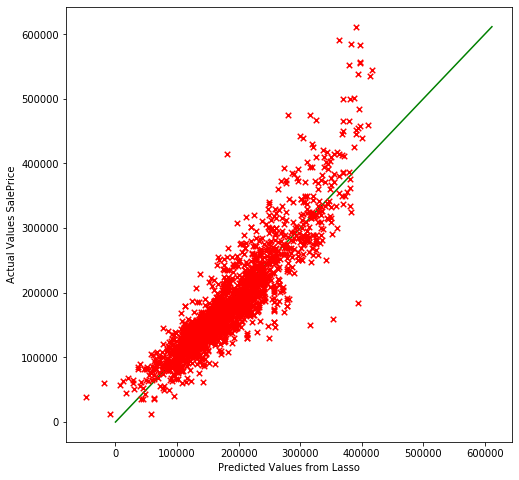

In [112]:
plt.figure(figsize=(8,8))
plt.scatter(ridge.predict(X), y, s=30, c='r', marker='x', zorder=10)
plt.xlabel("Predicted Values from Lasso")
plt.ylabel("Actual Values SalePrice")

plt.plot([0, np.max(y)], [0, np.max(y)], c = 'g')

plt.show()

In [113]:

ridge_csv=pd.DataFrame()

ridge_csv['Id']=test_df_feat['Id']
ridge_csv['SalePrice']=ridge.predict(test_df_feat[lwp_feat])
ridge_csv.to_csv('submission_ridge.csv')

### 4. Ridge Regularization

In [114]:
optimal_lasso1 = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso1.fit(X, y)


lasso1 = Lasso(alpha=optimal_lasso1.alpha_)

lasso_scores1 = cross_val_score(lasso1, X, y, cv=10)
#lasso_rmse = cross_val_score(lasso, X, y, cv=10,scoring='neg_mean_squared_error')

print(lasso_scores1)
print(np.mean(lasso_scores1))



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

[0.7898084  0.8196831  0.82760965 0.82363454 0.77717849 0.80415665
 0.81887087 0.78678262 0.79940905 0.7077955 ]
0.7954928868612811


.................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished


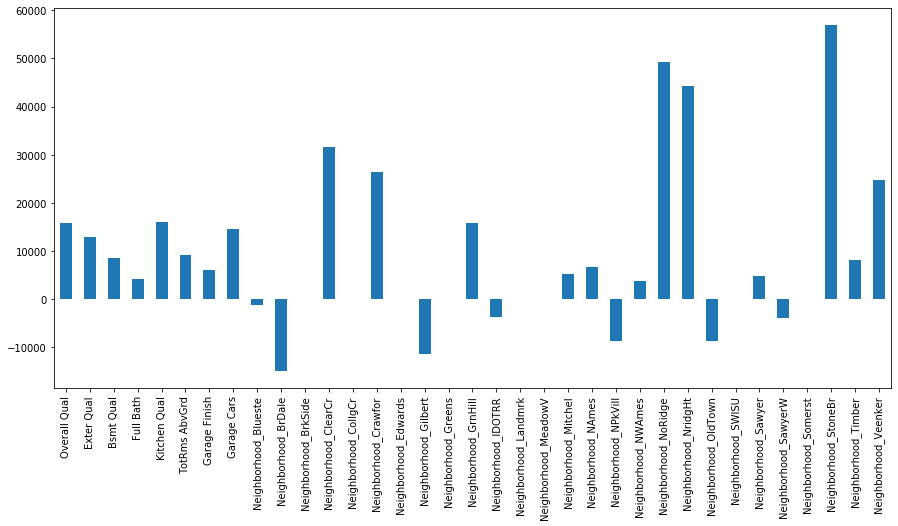

In [115]:
lasso1.fit(X, y)
lasso_coefs1 = pd.DataFrame({'variable':X.columns,
                            'coef':lasso1.coef_,
                            'abs_coef':np.abs(lasso1.coef_)})

lasso_coefs1.sort_values('abs_coef', inplace=True, ascending=False)

#lasso_coefs[lasso_coefs['abs_coef']>0]['variable']
pd.Series(lasso1.coef_, index=lwp_feat).plot.bar(figsize=(15, 7))



In [116]:
subb=pd.DataFrame()

subb['Id']=test_df_feat['Id']
subb['SalePrice']=lasso1.predict(test_df_feat[lwp_feat])
subb.to_csv('submission_lasso.csv')

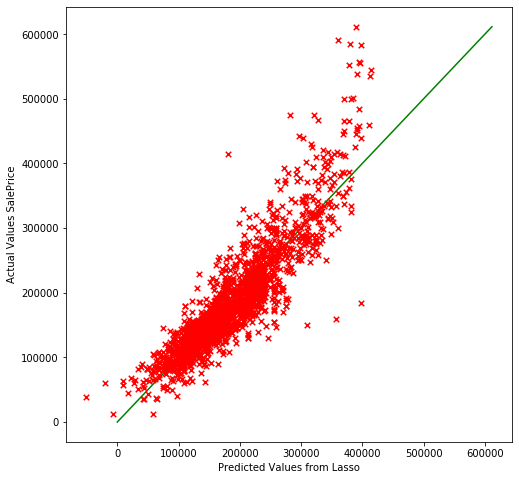

In [117]:
plt.figure(figsize=(8,8))
plt.scatter(lasso1.predict(X), y, s=30, c='r', marker='x', zorder=10)
plt.xlabel("Predicted Values from Lasso")
plt.ylabel("Actual Values SalePrice")

plt.plot([0, np.max(y)], [0, np.max(y)], c = 'g')

plt.show()

## Summary-Analysis
This data set has many data points and cutting them down to significant features for analysis was challenging. Many methods were adopted along the way. <br><br>Initially I added did not map many of the categorical data and this resulted in many columns for categorical data. This made it hard for further analysis. <br>
Another problem faced was after scaling the training data, the predictions were very bad in my case. Not scaling yielded a better prediction and R^2 score.<br><br>
Finally, many of the categorical data are not significant in our model. The key feature was neighbourhood as we can see from our coefficents plot.<br><br>
Ridge regression yielded a better result than lasso in this case.

Ridge mean prediction was **36182** as compared to Lasso **39070**

## Conclusion-and-Reccomendations

After analysis, we can see that location or neighbourhood makes a significant increase in Sale Price. Not only does it affect price positively, some neighbourhood affects negatively. After location, quality of the house and other qualities like exterior and basement quality also affects the price. Garage also is a factor.
<br><br>
To do well, finding the right neighbourhood is crucial with a strong focus on the quality of the house will be a key factor. Another thing to consider is also the kitchen quality. 